In [1]:
# 폴더구조 생성 및 고양이, 멍멍이 이미지 각 폴더로 복사

import os, shutil

original_dataset_dir = './Data/cat_dog/train'

base_dir = 'Data/cat_dog_full'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

## file 복사 ##
## 고양이와 멍멍이가 각각 12,500개
## train : 7,000 
## validation : 3,000
## test : 2,500 

fnames = ['cat.{}.jpg'.format(i) for i in range(7000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(7000,10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(10000,12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(7000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(7000,10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(10000,12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src,dst)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Found 14000 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
x_data의 shape : (20, 150, 150, 3)
t_data의 shape : (20,)
[1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0.]


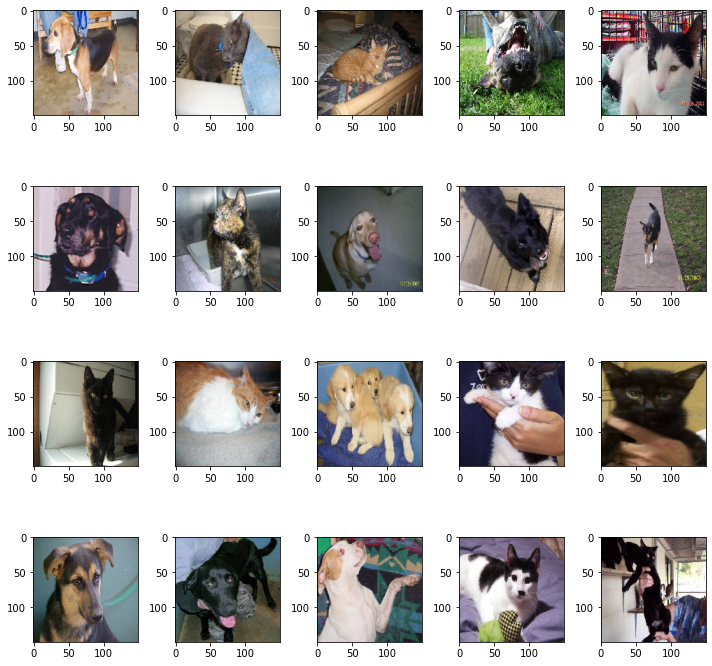

In [12]:
% reset
% matplotlib inline

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = './Data/cat_dog_full/train'
validation_dir = './Data/cat_dog_full/validation'

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,)
validation_datagen = ImageDataGenerator(rescale=1/255,)


# train data를 가져오면 > x_data(독립변수, 픽셀데이터), t_data(종속변수, label)
train_generator = train_datagen.flow_from_directory(
    train_dir,                # target directory : 데이터를 어디에서 가져올건가요!
    classes=['cats', 'dogs'], # label 적용을 어떻게 할건가요? 순서대로 레이블이 적용
                              # cats :0, dogs : 1
                              # 만약 classes를 명시하지 않으면 폴더명 순서로 label 이 잡혀요!
    target_size = (150,150),  # 이미지 size scaling(크기를 150x150으로 변경해서 들고와)
    batch_size = 20,          # 한번에 20개의 이미지를 가져와요!!
                              # label에 상관없이 가져와요!
    class_mode = 'binary',    # 이진분류이기 떄문에 'binary'
                              # 만약 MNIST처럼 다중분류면 'categorical'
                              # 기본값은 'categorical'
)



validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    subset='validation',
    classes=['cats', 'dogs'],
    class_mode="binary",
    batch_size = 20
)


# generator로 출력된 데이터의 shape을 확인!
for x_data, t_data in train_generator:
    print('x_data의 shape : {}'.format(x_data.shape)) # (20,150,150,3)
    print('t_data의 shape : {}'.format(t_data.shape)) # (2)
    break;


fig = plt.figure(figsize=(10,10))
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

for x_data, t_data in train_generator:
    
    for idx, img_data in enumerate(x_data):
        axs[idx].imshow(img_data)
        
    print(t_data)
    break;
    
fig.tight_layout()
plt.show()

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


model = Sequential()

model.add(layers.InputLayer(input_shape=(150, 150, 3)))
model.add(layers.Conv2D(16, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(rate=0.3))
model.add(layers.Dense(1, activation='sigmoid'))

epochs = 32

with tf.device('/device:GPU:1'):


    model.compile(
        optimizer = Adam(learning_rate=1e-3),
        loss='binary_crossentropy', 
        metrics=['acc'],
    )
    
    history = model.fit_generator(
        train_generator, 
        epochs=epochs,
        steps_per_epoch=train_generator.samples // epochs, 
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // epochs,
        verbose=1
    )




Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/32
437/437 [==============================] - 35s 80ms/step - loss: 0.7093 - acc: 0.5415
Epoch 2/32
437/437 [==============================] - 30s 69ms/step - loss: 0.6527 - acc: 0.6050
Epoch 3/32
437/437 [==============================] - 23s 53ms/step - loss: 0.5888 - acc: 0.6850
Epoch 4/32
437/437 [==============================] - 23s 53ms/step - loss: 0.5614 - acc: 0.7076
Epoch 5/32
437/437 [==============================] - 23s 53ms/step - loss: 0.5420 - acc: 0.7231
Epoch 6/32
437/437 [==============================] - 23s 53ms/step - loss: 0.5104 - acc: 0.7454
Epoch 7/32
437/437 [==============================] - 23s 53ms/step - loss: 0.4722 - acc: 0.7746
Epoch 8/32
437/437 [==============================] - 23s 53ms/step - loss: 0.4657 - acc: 0.7753
Epoch 9/32
437/437 [==============================] - 23s 53ms/step - loss: 0.4224 - acc: 0.8038
Epoch 10/32
437/437 [==============================

In [16]:
model.save("cat_dog_model")


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: cat_dog_model/assets
